<a href="https://colab.research.google.com/github/aldisstar/Taller-MIT/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Unsupervised Learning: K-Means Clustering

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

import numpy as np

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.3)

import matplotlib.pyplot as plt

from tqdm import tqdm

## Introduction

In contrast to supervised learning where data is tagged by an expert, unsupervised methods organize unlabled data to discover hidden patterns or data groupings without the need for human intervention. The ability of unsupervised learning to discover similarities and differences in information make it the ideal solution for applications like exploratory data analysis, cross-selling strategies, and customer segmentation.

Clustering is a type of unsupervised learning which groups unlabled data based on their similarities and differences. K-Means clustering is a common example of a cetroid-based clustering algorithm, where each cluster is associated with one of K centroids. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters. This is what we'll be exploring in today's activity.

## K-Means Clustering Refresher

Before we dive into a more complex example, we'll review how to implement k-means clutering with Python and scikit-learn with an artificial data set (i.e., randomly generated blobs).

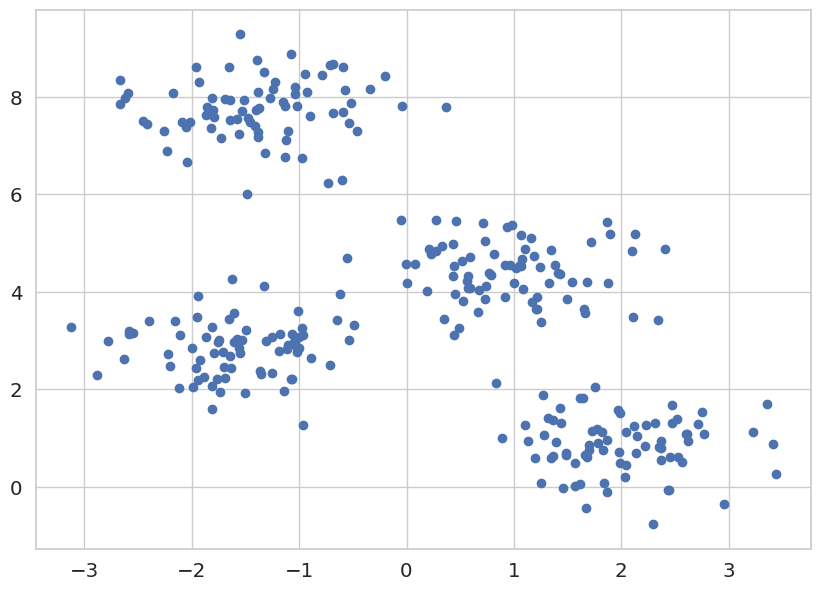

In [ ]:
# Generate an artificial data set
X, y = make_blobs(n_samples=300, centers=4,
                  cluster_std=0.60, random_state=0)

# Plot data
plt.scatter(X[:, 0], X[:, 1]);

K-means requires that we input the number of clusters for the algorithm to use. We already know that there are 4 clusters of points because we generated them ourselves. But we'll use this example to illustrate how to use the elbow method to select the optimal number of clusters.

The elbow method is a heuristic for determining where diminishing returns are no longer worth additional costs. First, we plot the inertia (the sum of squared distances of samples to their closest cluster center) for our clusters with different values of k. We want to look for the point in the graph where the change in inertia as the number of cluster increases goes from being large (i.e., a steep slope) to small (i.e., a shallow slope). This is the point where adding complexity to the model only leads to marginal improvements in the clustering. Remember, our goal should always be to create the simplest model that gives us an acceptable level of performance!

We can also use silhouette score as a measure of how clearly distinguished the clusters are. Values closer to 1 are better (i.e., there is good separation between clusters).

In [ ]:
inertia = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [ ]:
silhouette = {}
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(X)
    silhouette[i] = silhouette_score(X, kmeans.labels_, metric='euclidean')

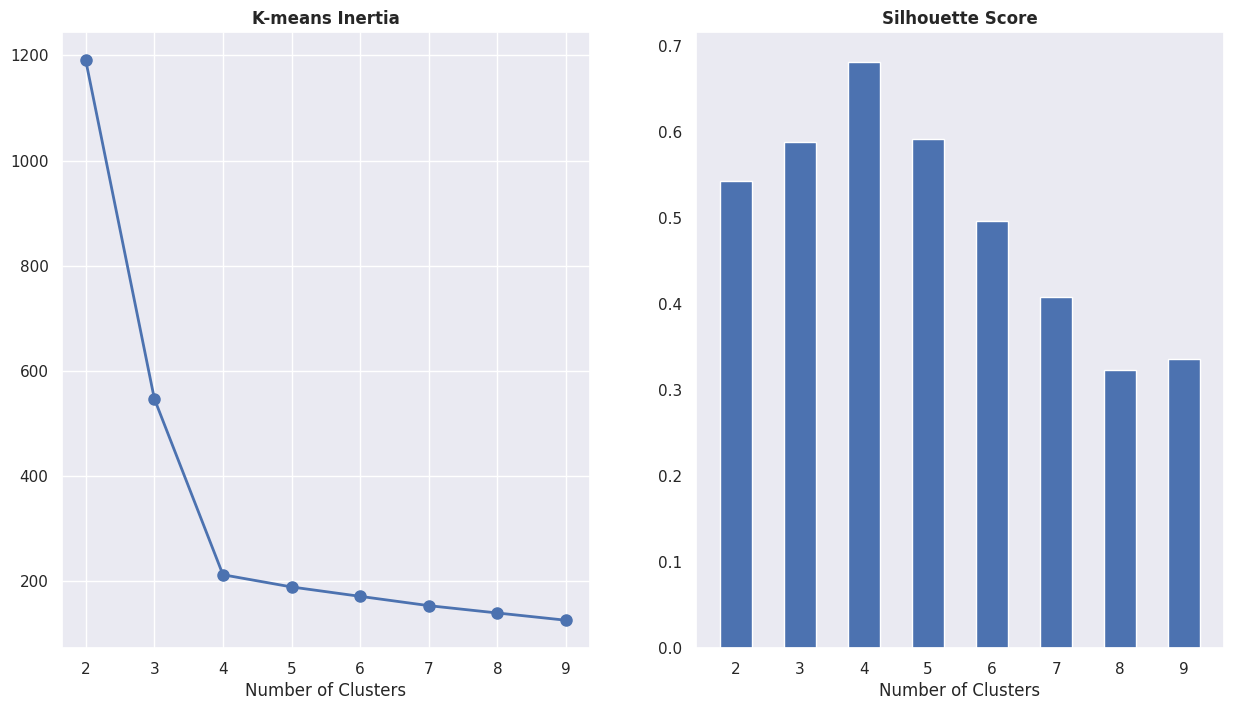

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8)
plt.xlabel('Number of Clusters')
plt.title('K-means Inertia', fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')


plt.show()

Looking at the charts above, we see that the optimal number of clusters is indeed 4. When 2 or 3 clusters are used, there is still room for improvement because inertia decreases significantly as more clusters are added. With a larger number of clusters, distances between points and the cluster centers do not decrease much. However, the complexity of the model increases and there is worse separation between clusters. With 4 clusters, we also get the best separation between groups based on the silhouette score.

### Exercise 1.1: Creating a K-Means Model

Now we can create our model!

Tasks:
* Use `KMeans` to create a new model and `.fit()` to fit it to the input data
* Print out the cluster centers

You can reference the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).


In [ ]:
# Create a KMeans model and fit it to the data set X
model = KMeans(4)
model.fit(X)

# print the cluster centers / centroids
print(model.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]]


### Exercise 1.2: Visualize the Clusters

Next, we want to visulize the clusters.

Tasks:
* Plot the clusters in different colors, along with each cluster centroid

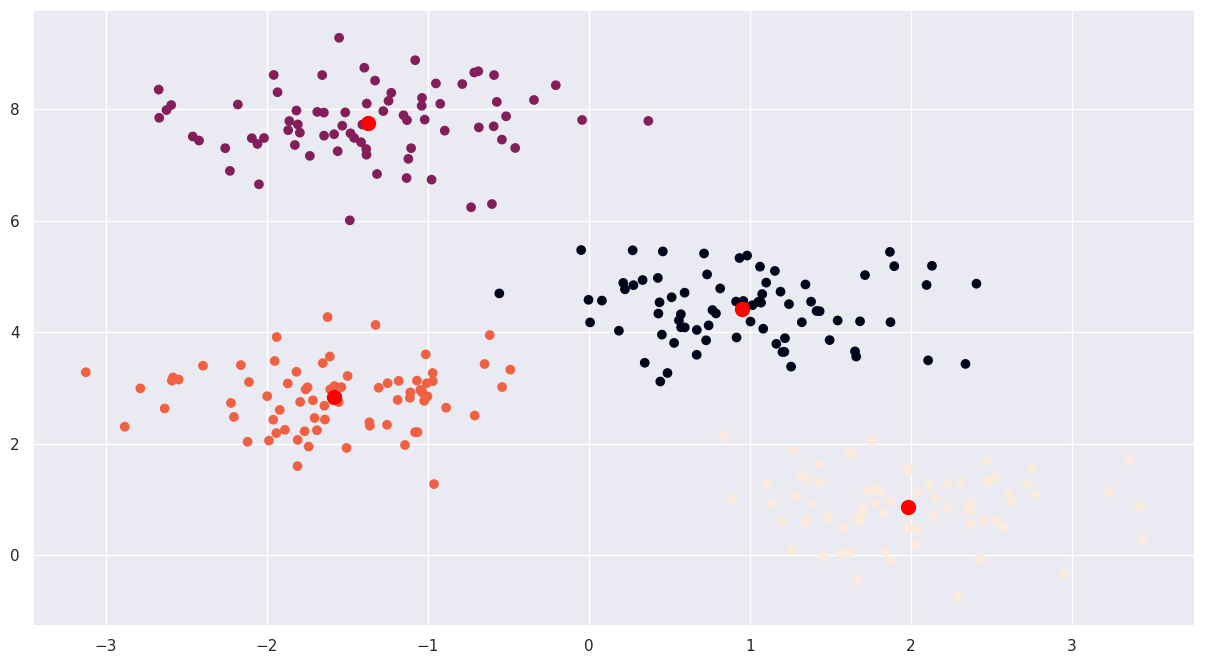

In [ ]:
#Plot the clusters and their centroids
plt.scatter(X[:,0],X[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red"); # Show the centres

We can see that the model was able to successfully identify which group each point belongs too!

## Customer Segmentation

For this exercise we will be using another Kaggle data set. This data set is for customer personality analysis. Before moving on, download the data from [here](https://drive.google.com/file/d/1adOqpTIjUDvI8pee3wiymqscfgNuqJ_C/view?usp=share_link) and add it to your Colab workspace by navigating to `Files` in the side bar and clicking upload (the same process that we used last week for the Kobe data set).


This data set contains 2240 data points, with information about 29 different customer attributes:

**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

In [ ]:
# customer_data = pd.read_csv('/content/drive/MyDrive/GSL Uruguay 2023/01 Tech Team/04 Colab Notebooks/data/marketing_campaign.csv', sep="\t")
customer_data = pd.read_csv('/content/marketing_campaign.csv', sep="\t")
customer_data = customer_data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"GoldProducts"})

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   Wines                2240 non-null   int64  
 10  Fruits               2240 non-null   int64  
 11  Meat                 2240 non-null   int64  
 12  Fish                 2240 non-null   int64  
 13  Sweets               2240 non-null   int64  
 14  GoldProducts         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Data Cleaning & Feature Engineering


As with any type of modeling, we need to clean and understand our data before moving forward. We'll need to remove any samples with missing data, do some feature engineering, and drop any variables that we don't want to include in our analysis. We'll also want to remove any outliers in our data to make the clustering more reliable. You've done a lot of this already, so this step is completed for you in the cells below. **Review and understand the new features before moving forward.**

In [ ]:
# Remove rows with missing values
customer_data = customer_data.dropna()

In [ ]:
# Let's create a new features called "Customer Length". This will be the number of days
# that a person has been registered as a customer in the database relative to the most recent
# customer to sign up.

# First, convert the signup date to a datetime data type
customer_data['Dt_Customer'] = pd.to_datetime(customer_data['Dt_Customer'])
# Then we find the maximum date in the data frame
latest_date = customer_data['Dt_Customer'].max()
# Create a new column for our feature and store the
customer_data['Customer_For'] = (latest_date - customer_data['Dt_Customer']).dt.days


# We'll also create features for age, total spending, living alone or with a partner,
# total number of children, family size, and whether or not the customer is a parent

# Age of customer this year
customer_data["Age"] = 2023 - customer_data["Year_Birth"]

#Total spendings on various items
customer_data["Spent"] = customer_data["Wines"] + customer_data["Fruits"] + customer_data["Meat"] \
                        + customer_data["Fish"]+ customer_data["Sweets"]+ customer_data["GoldProducts"]

# Deriving living situation by marital status "Alone"
customer_data["Living_With"] = customer_data["Marital_Status"].replace({"Married":"Partner",
                                                                        "Together":"Partner",
                                                                        "Absurd":"Alone",
                                                                        "Widow":"Alone",
                                                                        "YOLO":"Alone",
                                                                        "Divorced":"Alone",
                                                                        "Single":"Alone",})

#Feature indicating total children living in the household
customer_data["Children"] = customer_data["Kidhome"] + customer_data["Teenhome"]

#Feature for total members in the householde
customer_data["Family_Size"] = customer_data["Living_With"].replace({"Alone": 1, "Partner":2})+ customer_data["Children"]

#Feature pertaining parenthood
customer_data["Is_Parent"] = np.where(customer_data.Children > 0, 1, 0)

<ipython-input-45-7092376689bd>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_data['Dt_Customer'] = pd.to_datetime(customer_data['Dt_Customer'])


In [ ]:
# We'll drop some of our redundant features to make our data easier to manage
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
customer_data = customer_data.drop(to_drop, axis=1)

Relative Plot Of Some Selected Features: A Data Subset


<Figure size 1500x800 with 0 Axes>

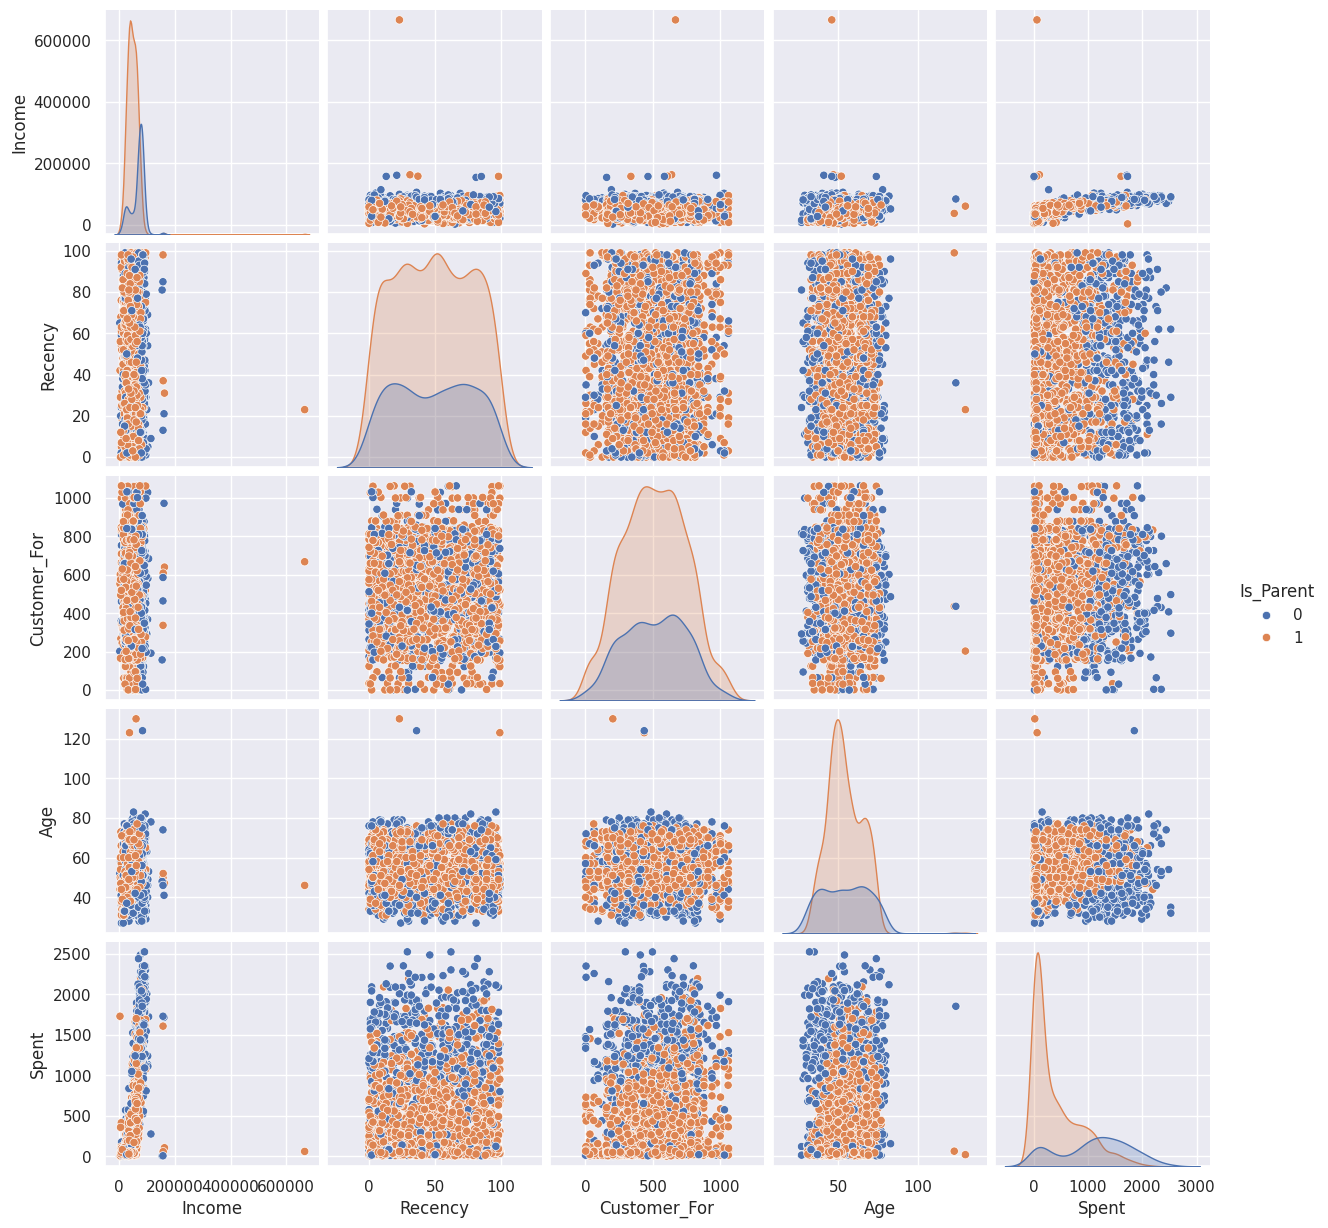

In [ ]:
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Relative Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(customer_data[To_Plot], hue= "Is_Parent")
plt.show()

In [ ]:
# Looking at the plots above, we can see that there are some outliers.
# We'll drop these by setting a cap on age and income
customer_data = customer_data[(customer_data["Age"] < 90)]
customer_data = customer_data[(customer_data["Income"] < 600000)]

#### Data Preprocessing



1.   Scaling the features using the standard scaler
3.   Creating a subset dataframe for dimensionality reduction
4.   Perform dimensionality reduction with PCA




In [ ]:
# We're going to be modifying our dataset further for clustering so we're going to
# create a copy. Once we have our clusters we want to be able to go back and look at
# patterns in the unmodified data.
customer_data_clustering = customer_data.copy()

In [ ]:
# We won't use data on which deals the customers accepted, for our analysis so we will drop these columns
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
customer_data_clustering = customer_data_clustering.drop(cols_del, axis=1)

##### **Exercise 2.1: One-Hot Encoding of Categorical Variables**

Create one-hot vectors for the categorical variables in the dataset: "Education" and "Living_With"

In [ ]:
# : Create one-hot vectors for categorical variables: 'Education' and 'Living_With'
customer_data_clustering = pd.get_dummies(customer_data_clustering, prefix=['Education', 'Living_With'], columns=['Education', 'Living_With'])

##### **Exercise 2.2: Scale Input Data**

Use the `StandardScaler()` function and the `.fit()` method to scale the dataset.

In [ ]:
#  Use the StandardScaler function that's been imported for you to scale the data
scaler = StandardScaler()
scaler.fit(customer_data_clustering)
customer_data_clustering = pd.DataFrame(scaler.transform(customer_data_clustering), columns=customer_data_clustering.columns )
customer_data_clustering

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,GoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Living_With_Alone,Living_With_Partner
0,0.29,-0.82,-0.93,0.31,0.98,1.55,1.69,2.45,1.48,0.85,0.35,1.43,2.50,-0.56,0.69,1.97,1.02,1.68,-1.26,-1.76,-1.58,-0.31,-0.16,0.99,-0.44,-0.53,1.35,-1.35
1,-0.26,1.04,0.91,-0.38,-0.87,-0.64,-0.72,-0.65,-0.63,-0.73,-0.17,-1.13,-0.57,-1.17,-0.13,-1.67,1.27,-0.96,1.40,0.45,0.63,-0.31,-0.16,0.99,-0.44,-0.53,1.35,-1.35
2,0.91,-0.82,-0.93,-0.80,0.36,0.57,-0.18,1.34,-0.15,-0.04,-0.69,1.43,-0.23,1.29,-0.54,-0.17,0.33,0.28,-1.26,-0.65,-1.58,-0.31,-0.16,0.99,-0.44,-0.53,-0.74,0.74
3,-1.18,1.04,-0.93,-0.80,-0.87,-0.56,-0.66,-0.50,-0.59,-0.75,-0.17,-0.76,-0.91,-0.56,0.28,-1.92,-1.29,-0.92,0.07,0.45,0.63,-0.31,-0.16,0.99,-0.44,-0.53,-0.74,0.74
4,0.29,1.04,-0.93,1.55,-0.39,0.42,-0.22,0.15,-0.00,-0.56,1.39,0.33,0.11,0.06,-0.13,-0.82,-1.03,-0.31,0.07,0.45,0.63,-0.31,-0.16,-1.01,-0.44,1.90,-0.74,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0.43,-0.82,0.91,-0.10,1.20,0.42,0.07,0.08,2.21,3.93,-0.17,1.79,0.11,-0.56,-0.13,0.12,0.16,1.22,0.07,0.45,0.63,-0.31,-0.16,0.99,-0.44,-0.53,-0.74,0.74
2208,0.56,2.90,0.91,0.24,0.30,-0.66,-0.61,-0.69,-0.66,-0.69,2.43,1.43,-0.23,-0.25,0.69,-1.94,1.96,-0.27,2.74,2.66,0.63,-0.31,-0.16,-1.01,-0.44,1.90,-0.74,0.74
2209,0.23,-0.82,-0.93,1.45,1.79,0.55,0.22,-0.10,-0.37,-0.39,-0.69,-0.76,0.11,2.21,0.28,-0.85,-1.03,1.05,-1.26,-1.76,-1.58,-0.31,-0.16,0.99,-0.44,-0.53,1.35,-1.35
2210,0.80,-0.82,0.91,-1.42,0.36,0.09,0.21,0.77,0.07,0.33,-0.17,0.70,0.80,1.29,-0.96,-0.84,1.10,0.39,0.07,0.45,0.63,-0.31,-0.16,-1.01,2.25,-0.53,-0.74,0.74


##### **Exercise 2.3: Dimensionality Reduction**

Use PCA to reduce the dimensionality of the data set to three features:


*   Create an instance of `PCA`
*   Use the `.fit()` method to fit the model to the data
*   Transform the data with the PCA model and store it in a new data frame (*customer_data_clustering_PCA*)


You can find documentation for PCA [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)


In [ ]:
# Use PCA to reduce the dimensionality of the data set down to 3 features

#  Create an instance of a PCA model
pca = PCA(n_components=3)

#  Fit the PCA model to the data
pca.fit(customer_data_clustering)

#  Transform the clustering data with the PCA model and store it in a new
#       data frame, customer_data_clustering_PCA
customer_data_clustering_PCA = pd.DataFrame(pca.transform(customer_data_clustering), columns=(["PC1", "PC2", "PC3"]))
customer_data_clustering_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2212.00,0.00,2.88,-5.97,-2.55,-0.79,2.42,7.39
PC2,2212.00,-0.00,1.75,-5.36,-1.20,-0.09,1.23,6.23
PC3,2212.00,0.00,1.47,-2.47,-1.25,-0.39,1.30,4.00


#### Modeling

Now we're ready to model. Since the number of clusters is a required input to the k-means clustering algorithm, we'll need to identify the optimal number to select. Once we have done that we can fit the model to our data and visualize the final clusters.




##### **Exercise 2.4: Identify the Optimal Number of Clusters**

We'll use the elbow method to determine the optimal number of clusters for our model.

Tasks:


*   Calculate the intertia for k = [2, 10]
*   Calculate the silhouette score for k = [2, 10]
*   Plot intertia and silhouette score and choose the number of clusters that you will use to fit your model



In [ ]:
# Run this cell before running any of the following cells
if 'Cluster_ID' in customer_data_clustering_PCA.columns:
    customer_data_clustering_PCA = customer_data_clustering_PCA.drop(columns=['Cluster_ID'])

In [ ]:
inertia = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(customer_data_clustering_PCA)
    #  Calculate inertia and append it to the list of values
    inertia.append(kmeans.inertia_)

inertia

[15648.571657601282,
 11414.41767582949,
 8933.990811838801,
 7636.083960286474,
 6420.3878775369385,
 5297.4742860484885,
 4654.296107783002,
 4097.603133067782]

In [ ]:
silhouette = {}
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(customer_data_clustering_PCA)
    #  Calculate silhouette score and append it to the list of values
    silhouette[i] = silhouette_score(customer_data_clustering_PCA, kmeans.labels_, metric='euclidean')

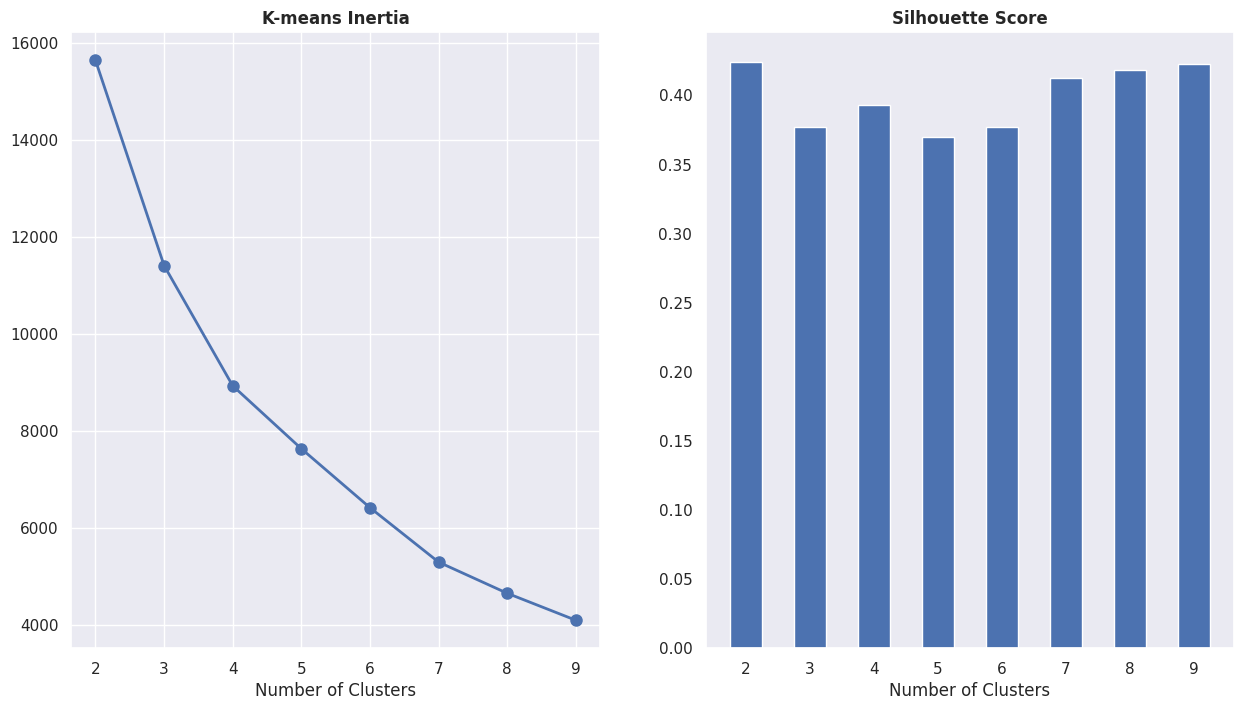

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})

#  Plot Inertia
plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8)
plt.xlabel('Number of Clusters')
plt.title('K-means Inertia', fontweight='bold')
plt.grid(True)


#  Plot silhouette score
plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')


plt.show()

##### **Exercise 2.5: Create and Fit a K-Means Model**

Now that we've identified the optimal number of clusters, we're ready to fit our k-means model. Complete the follow tasks below:
* Use `KMeans` to create a k-means model
* Use the `.fit_predict` method to perform clustering and get the label for each data point
* Get the centroids of the clusters
* Add the labels to the customer_data and customer_data_clustering_PCA data frames as a new column

In [ ]:
#  Create a KMeans model
kmeans = KMeans(n_clusters=4, random_state=17, init='k-means++')

#  Perform clustering and get the label for each data point
kmeans_labels = kmeans.fit_predict(customer_data_clustering_PCA)

#  Get the centroid of each cluster
centroids = kmeans.cluster_centers_

#  Add the Cluster ID for each data point to customer_data and customer_data_clustering_PCA
customer_data['Cluster_ID'] = kmeans_labels
customer_data_clustering_PCA['Cluster_ID'] = kmeans_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroids

array([[-2.44910979, -0.08975654, -1.10891769],
       [ 4.15203354, -0.77480081, -0.35451431],
       [-1.93764564, -1.41625919,  1.69247509],
       [ 0.78872841,  1.99849034,  0.51771478]])

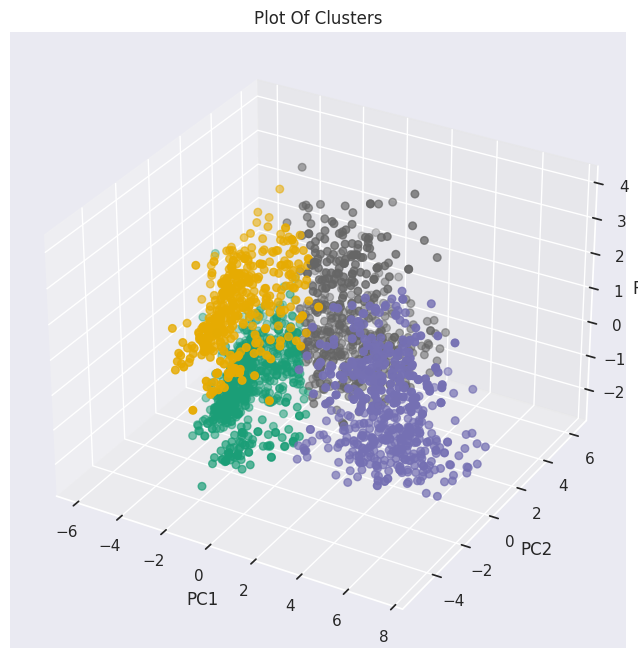

In [ ]:
# Now that we have an ID for each of our data points we can visualize our clusters

# Plot clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(customer_data_clustering_PCA['PC1'], customer_data_clustering_PCA['PC2'], customer_data_clustering_PCA['PC3'], s=30, c=customer_data_clustering_PCA['Cluster_ID'], marker='o', cmap='Dark2')

# It's important to clearly label our visualizations
ax.set_title("Plot Of Clusters")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

#### Evaluating the Clustering

Since this is unsupervised learning, we don't have a label that will allow us to assess our model's accuracy (or any of the other metrics we discussed previously). Instead, we can use different metrics to assess the quality of our clustering and identify clusters that we may want to investigate further:



*   **Cluster Cardinality** - the number of examples per cluster
*   **Cluster Magnitude** - the sum of distances from all examples in a cluster to the centroid of the cluster
*   **Silhouette Coefficient** - a measure of how clearly distinguished and accurate the clusters are. Values range from -1 to 1 where


> - -1 means clusters are assigned in the wrong way
- 0 means that clusters are indifferent, or we can say that the distance between clusters is not significant
- 1 means that clusters are well apart from each other and clearly distinguished







##### **Exercise 2.6: Cluster Cardinality**

Create a bar chart showing the number of data points in each cluster. You may find it useful to a seaborn [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html).

Text(0, 0.5, 'Points in Cluster')

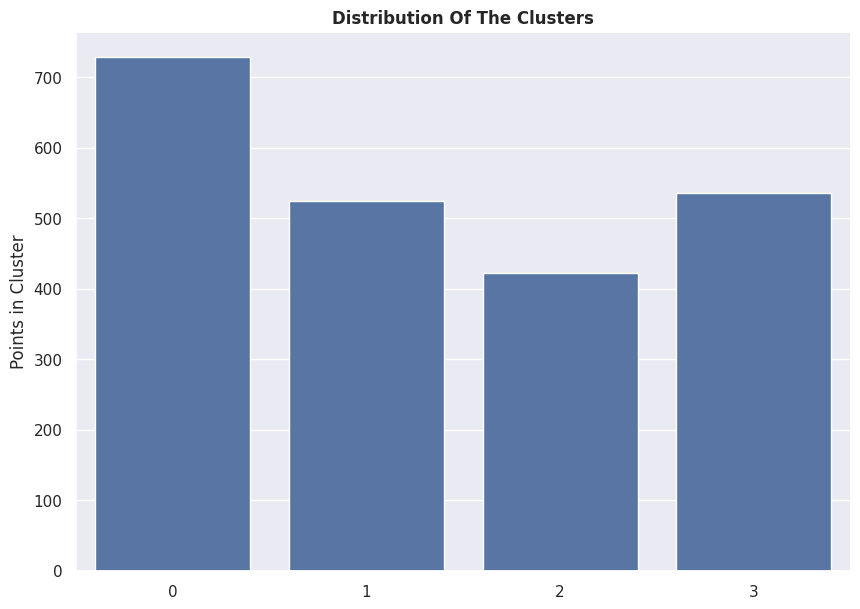

In [ ]:
sns.set(rc={'figure.figsize':(10,7)})

#  Create a bar chart showing the number of data points in each cluster
fig = sns.countplot(x=customer_data['Cluster_ID'])
fig.set_title("Distribution Of The Clusters", fontweight='bold')
fig.set_ylabel('Points in Cluster')

In [ ]:
centroids

array([[-2.44910979, -0.08975654, -1.10891769],
       [ 4.15203354, -0.77480081, -0.35451431],
       [-1.93764564, -1.41625919,  1.69247509],
       [ 0.78872841,  1.99849034,  0.51771478]])

In addition to cluster cardinality, we'll plot cluster magnitude and magnitude vs. cardinality.

Text(0, 0.5, 'Total Point-to-Centroid Distances')

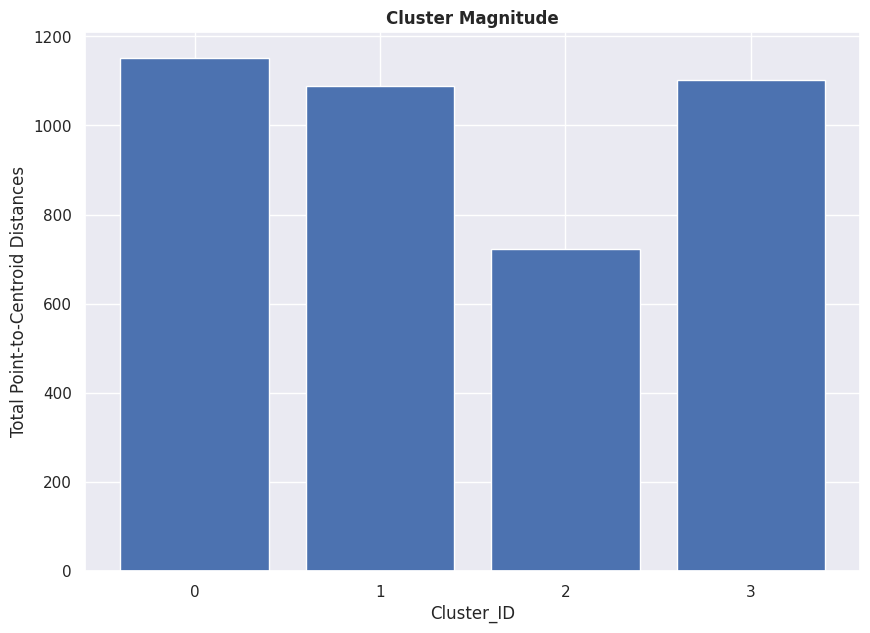

In [ ]:
from math import dist

# Start with an array of zeros for each cluster
sum_of_diffs = [0 for i in range(len(centroids))]

# For each data point, calculate the distance from its cluster centroid and add it to the total
for i, point in customer_data_clustering_PCA.iterrows():
    clust_ID = int(point['Cluster_ID'])
    sum_of_diffs[clust_ID] += dist(centroids[clust_ID], [point['PC1'], point['PC2'], point['PC3']])

# Plot cluster magnitude
plt.bar(x=[str(x) for x in range(2,len(centroids)+2)], height=sum_of_diffs)
plt.title('Cluster Magnitude',fontweight='bold')
plt.xlabel('Cluster_ID')
plt.ylabel('Total Point-to-Centroid Distances')

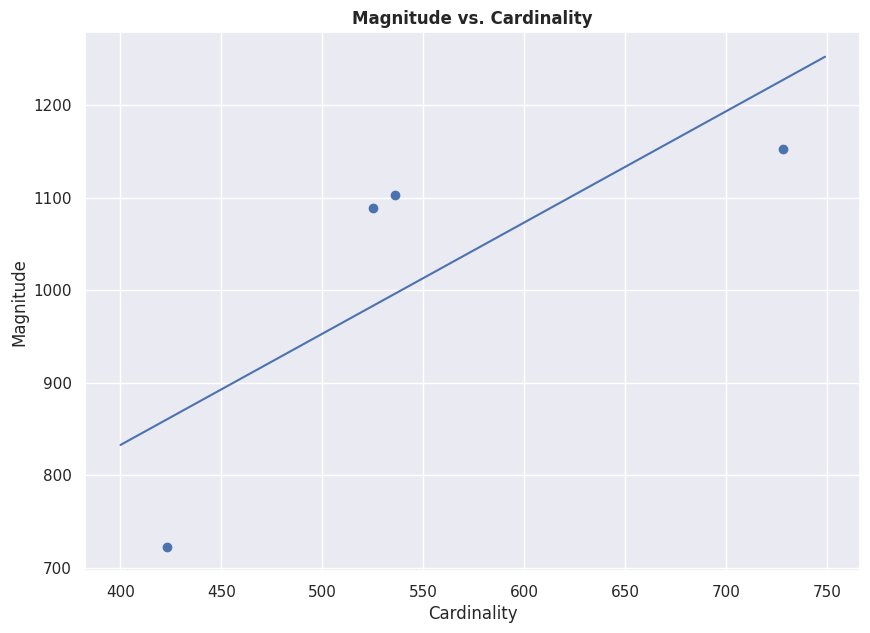

In [ ]:
# Plot magnitude vs. cardinality

cluster_sizes = customer_data_clustering_PCA['Cluster_ID'].value_counts().sort_index().tolist()

plt.scatter(x=cluster_sizes, y=sum_of_diffs)
plt.title('Magnitude vs. Cardinality',fontweight='bold')
plt.xlabel('Cardinality')
plt.ylabel('Magnitude')

m, b = np.polyfit(cluster_sizes, sum_of_diffs, 1)
x = range(400, 750)
plt.plot(x, m*x + b)

##### **Exercise 2.7: Silhouette Score**

Use the `silhouette_score` function to calculate the score the clustering output. You can reference the documentation for this function [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score).




In [ ]:
#  Calculate the silhouette score of the clustering model
silhouette_score(customer_data_clustering_PCA[['PC1', 'PC2', 'PC3']], customer_data_clustering_PCA['Cluster_ID'])

0.3929517835057929

#### Customer Profiling

##### **Exercise 2.8: Exploring Patterns in the Clustered Data**
Now that we've confirmed that our clustering output is okay, we can see what we can learn about the customers in each group. This is where you get to be creative! Explore the differences in the features of each cluster, and how data from different variables is distributed across clusters. **Your goal is to create customer profiles for each of the clusters from your model.**

Here is an example of a customer profile: *Cluster X includes customers with higher incomes who have no children. Customers span all ages. Some are single, but the slight majority have a partner. They spend the most on wines out of all the customer groups.*


Creating different charts will help you visualize some of the patterns in the data. You may find the [Seaborn library](https://seaborn.pydata.org/) usefull for this. Some examples are provided below. A few more questions that you could explore include:


*   Which cluster(s) of customers spends the most?
*   Are there clusters of customers that have no children and other clusters of customers with serveral children? How does this impact spending?
*   Which group of customer is the oldest?

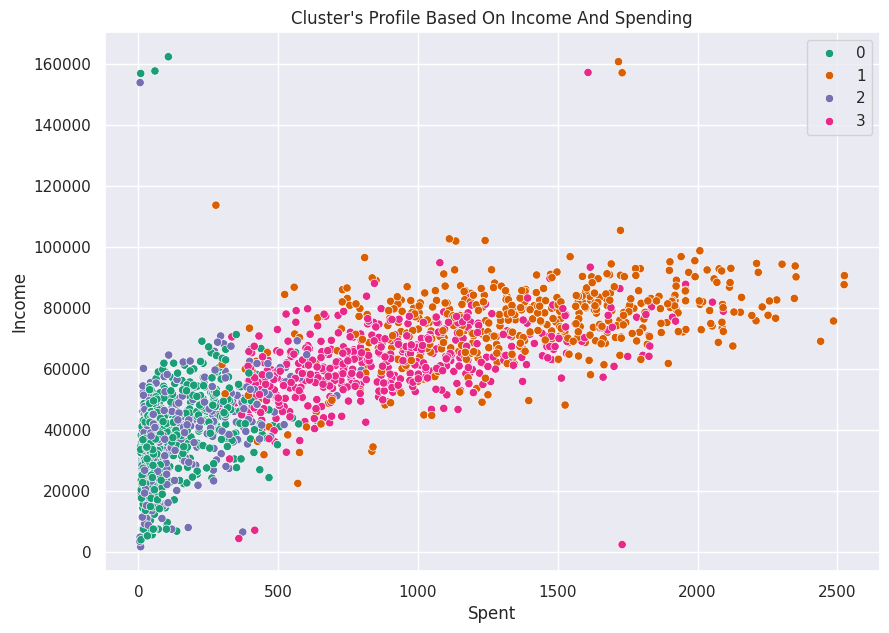

In [ ]:
pl = sns.scatterplot(data = customer_data,x=customer_data["Spent"], y=customer_data["Income"],hue=customer_data['Cluster_ID'], palette='Dark2')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Number of Deals Purchased')

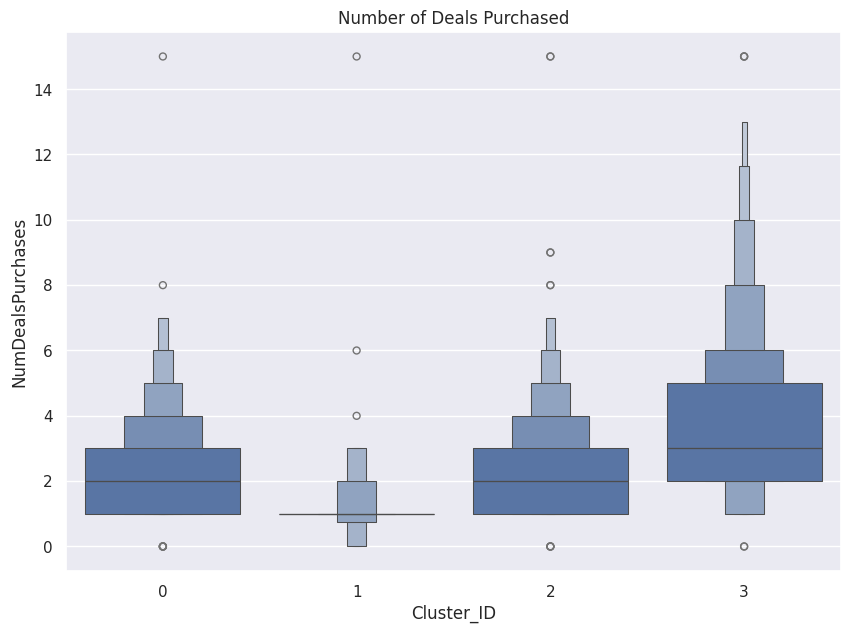

In [ ]:
pl=sns.boxenplot(y=customer_data["NumDealsPurchases"],x=customer_data['Cluster_ID'])
pl.set_title("Number of Deals Purchased")

In [ ]:
#  Explore the patterns within, and between, the different clusters by creating additional data visualizations

In [ ]:
customer_data_clustering_PCA.head()

,PC1,PC2,PC3,Cluster_ID
0,5.04,-0.82,1.72,1
1,-2.82,-0.54,1.65,2
2,2.59,-0.45,-1.31,1
3,-2.69,-1.22,-1.70,0
4,-0.66,0.71,-0.81,0


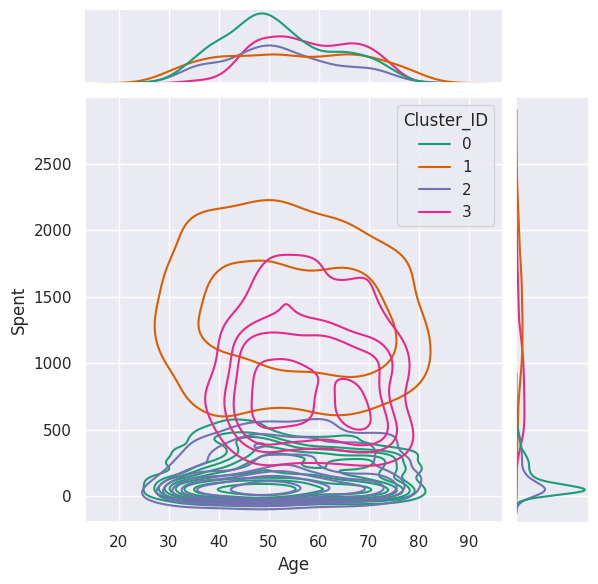

In [ ]:
sns.jointplot(x = "Age",y = "Spent", data=customer_data, kind='kde', hue='Cluster_ID', palette='Dark2')

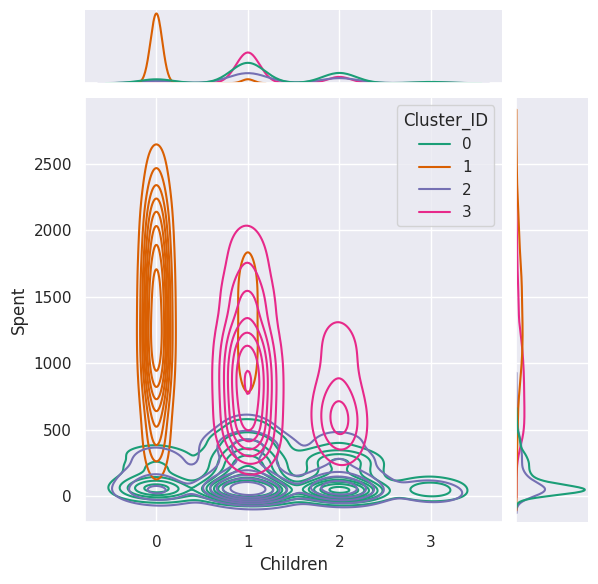

In [ ]:
sns.jointplot(x = "Children",y = "Spent", data=customer_data, kind='kde', hue='Cluster_ID', palette='Dark2')

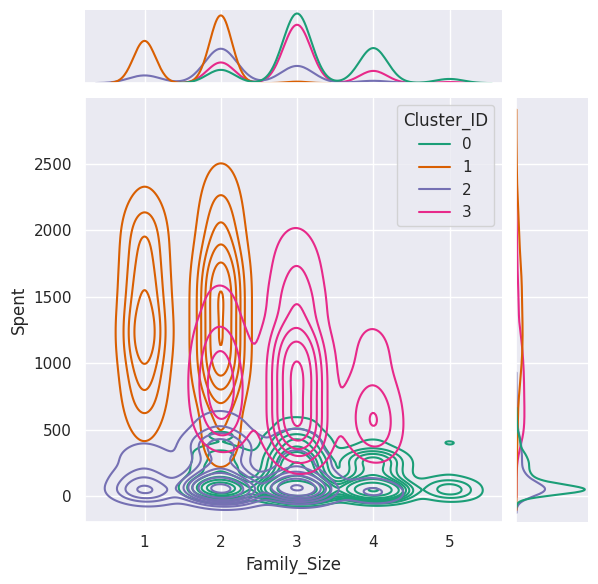

In [ ]:
sns.jointplot(x = "Family_Size",y = "Spent", data=customer_data, kind='kde', hue='Cluster_ID', palette='Dark2')

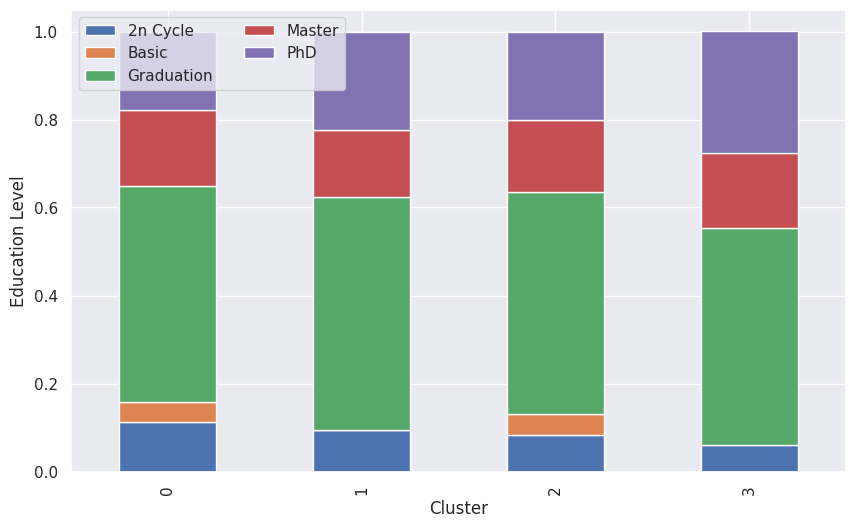

In [ ]:
cross_tab_prop = pd.crosstab(index=customer_data['Cluster_ID'],
                             columns=customer_data['Education'],
                             normalize="index")
cross_tab_prop


cross_tab_prop.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Cluster")
plt.ylabel("Education Level")
plt.show()


In [ ]:
customer_data.groupby('Cluster_ID')[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'GoldProducts', 'Spent']].mean().T

Cluster_ID,0,1,2,3
Wines,56.33,604.34,72.71,534.05
Fruits,5.30,65.00,6.57,32.62
Meat,27.11,456.08,32.14,180.40
Fish,8.07,95.98,8.21,43.92
Sweets,5.35,67.48,5.91,33.59
GoldProducts,16.72,75.23,19.86,69.21
Spent,118.88,1364.11,145.40,893.79


In [ ]:
customer_data.groupby('Cluster_ID')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Spent']].mean().T

Cluster_ID,0,1,2,3
NumWebPurchases,2.38,5.05,2.63,6.62
NumCatalogPurchases,0.61,5.85,0.77,3.86
NumStorePurchases,3.44,8.32,3.56,8.33
Spent,118.88,1364.11,145.40,893.79


728, 525, 423, 536

<Axes: xlabel='Cluster_ID', ylabel='NumWebVisitsMonth'>

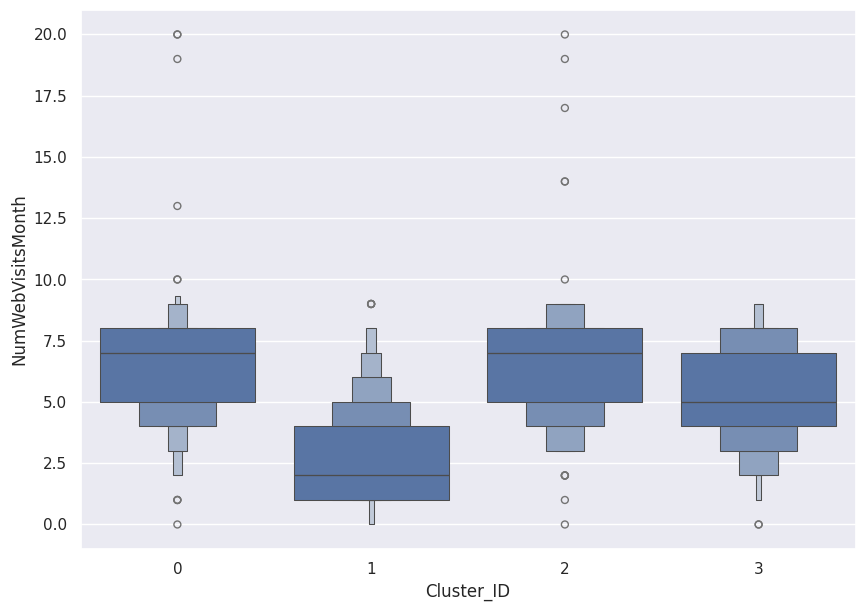

In [ ]:
sns.boxenplot(data=customer_data, x='Cluster_ID', y='NumWebVisitsMonth')

<Axes: xlabel='Living_With', ylabel='count'>

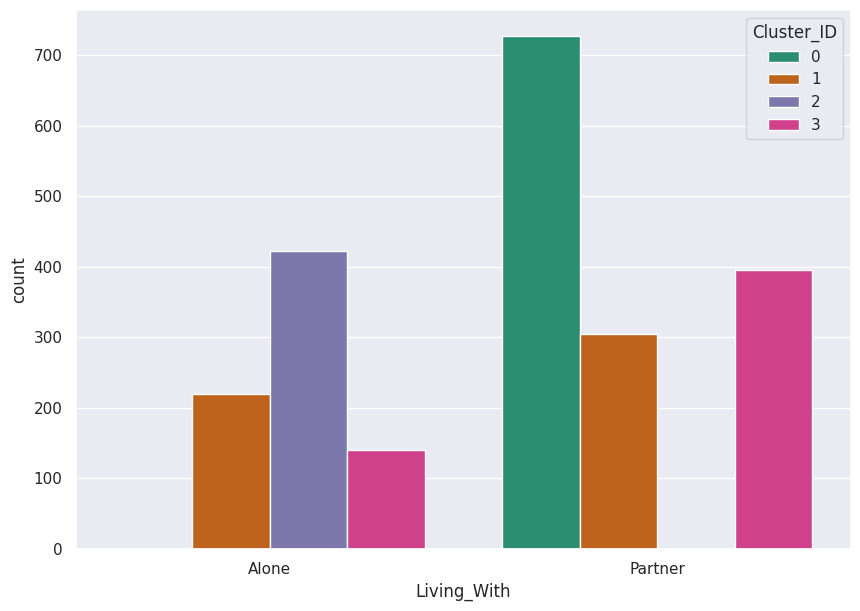

In [ ]:
sns.countplot(x = "Living_With", data=customer_data, hue='Cluster_ID', palette='Dark2')

<Axes: xlabel='Children', ylabel='count'>

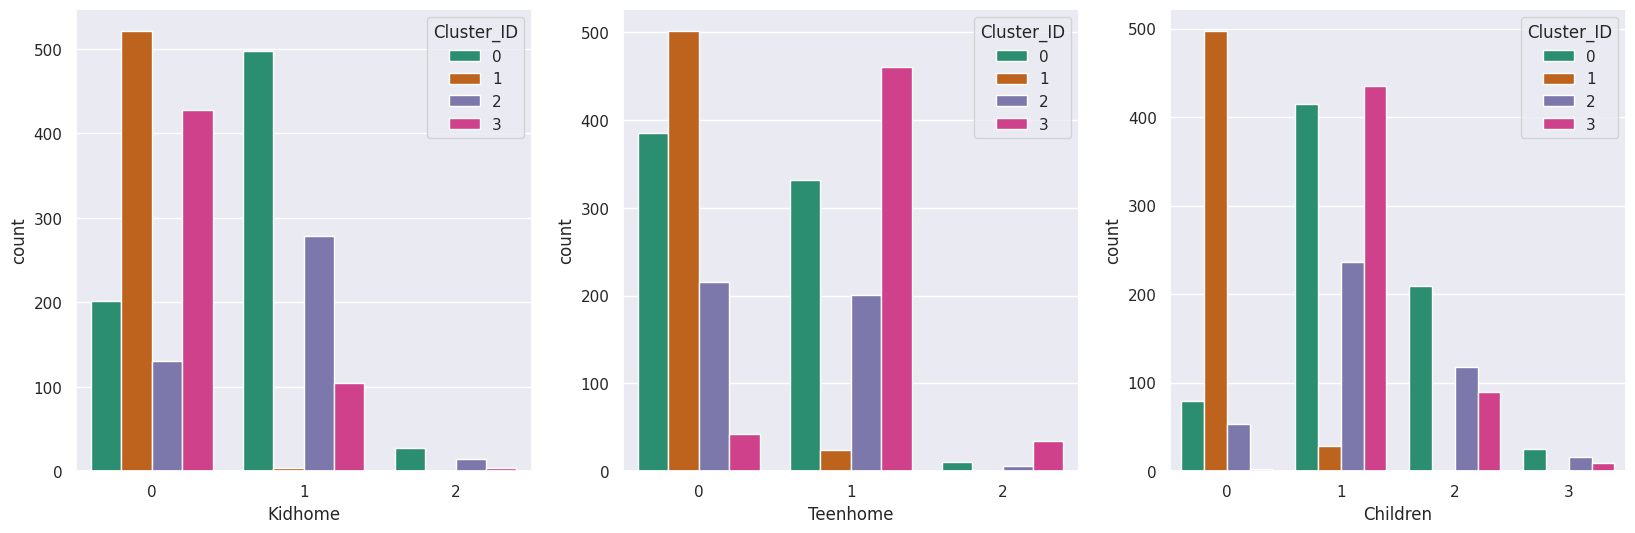

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(x = "Kidhome", data=customer_data, hue='Cluster_ID', palette='Dark2', ax=axes[0])
sns.countplot(x = "Teenhome", data=customer_data, hue='Cluster_ID', palette='Dark2',ax=axes[1])
sns.countplot(x = "Children", data=customer_data, hue='Cluster_ID', palette='Dark2',ax=axes[2])

# Example customer profiles:

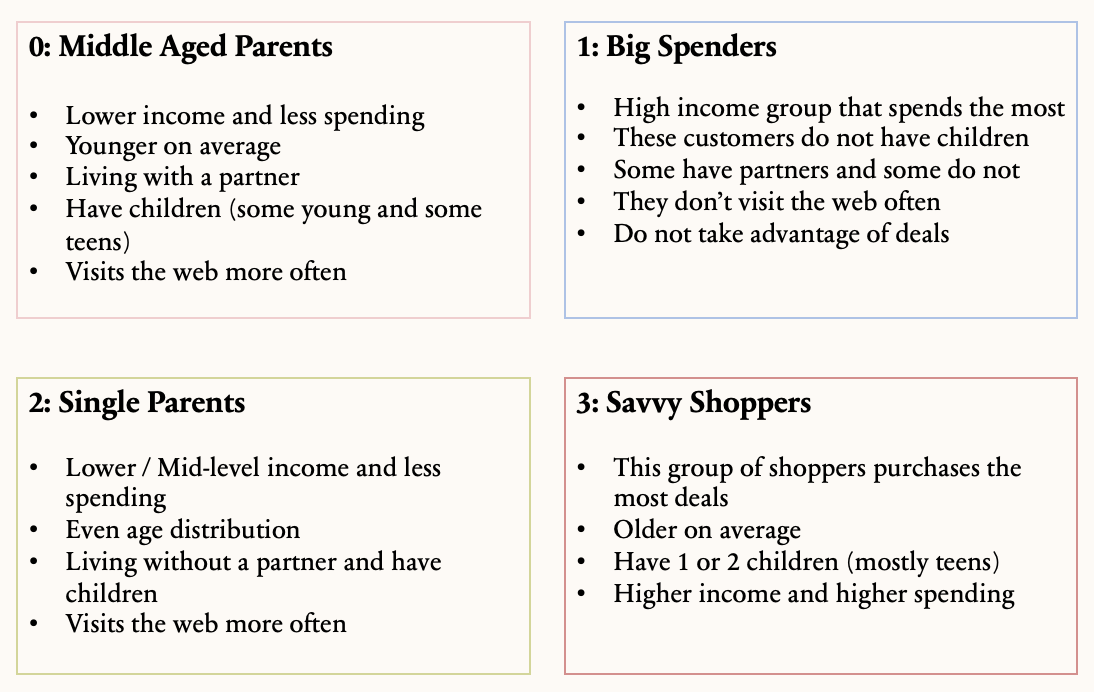

### Reflection

1. Think about the analysis that you just completed. If you were a company, why would you want to know which customers are similar to each other and what their behavior is like?
2. Now that all of our customers have been associated with a certain cluster, what are some things that we can do with this information?

